In [4]:
# 데이터 로드
import pandas as pd

cctv_data = pd.read_csv("../data/서울특별시강서구안심이CCTV설치현황.csv",encoding="cp949")

In [5]:
# 0번째 행 삭제
cctv_data = cctv_data[1:]

# 위도와 경도만 저장
cctv_data_ll = cctv_data[["위도","경도"]]

# 주소, 용도만 저장
cctv_data_au = cctv_data[["안심 주소","CCTV 용도"]]

In [6]:
# 위도와 경도만 저장한 데이터프레임
cctv_data_ll

,위도,경도
1,37.528107,126.84598
2,37.52947231,126.8496212
3,37.52999848,126.8534461
4,37.530087,126.856926
5,37.53159999,126.8387572
...,...,...
2417,37.579197,126.81064
2418,37.579197,126.81064
2419,37.579613,126.81066
2420,37.579613,126.81066


In [7]:
# 주소와 용도만 저장한 데이터프레임
cctv_data_au

,안심 주소,CCTV 용도
1,P253001(A5002)_화곡1동 908-9(호돌이 공원),도심공원
2,P303005_화곡8동 892-17(모태어린이공원),도심공원
3,P263002_화곡2동 883-3 하마터어린이공원,도심공원
4,P263001_화곡2동 845-19 뜸부기어린이공원,도심공원
5,P253005_화곡1동 355-12(필마어린이공원),도심공원
...,...,...
2417,S222006(B1006)_방화3동 816 방화6단지 602동 앞(삼정초등학교)(보...,어린이안전
2418,S222006(B1006)_방화3동 816 방화6단지 602동 앞(삼정초등학교)(보...,어린이안전
2419,S222001(A1064)_(스쿨존)방화3동 798(삼정초등학교),어린이안전
2420,S222001(A1064)_(스쿨존)방화3동 798(삼정초등학교)(보조1)정문방향,어린이안전


In [8]:
# 모든 정보가 저장된 데이터프레임
cctv_data

,자치구,안심 주소,CCTV 용도,위도,경도,CCTV 수량,수정 일시
1,강서구,P253001(A5002)_화곡1동 908-9(호돌이 공원),도심공원,37.528107,126.84598,1,2021-01-29
2,강서구,P303005_화곡8동 892-17(모태어린이공원),도심공원,37.52947231,126.8496212,1,2021-01-29
3,강서구,P263002_화곡2동 883-3 하마터어린이공원,도심공원,37.52999848,126.8534461,1,2021-01-29
4,강서구,P263001_화곡2동 845-19 뜸부기어린이공원,도심공원,37.530087,126.856926,1,2021-01-29
5,강서구,P253005_화곡1동 355-12(필마어린이공원),도심공원,37.53159999,126.8387572,1,2021-01-29
...,...,...,...,...,...,...,...
2417,강서구,S222006(B1006)_방화3동 816 방화6단지 602동 앞(삼정초등학교)(보...,어린이안전,37.579197,126.81064,1,2021-01-29
2418,강서구,S222006(B1006)_방화3동 816 방화6단지 602동 앞(삼정초등학교)(보...,어린이안전,37.579197,126.81064,1,2021-01-29
2419,강서구,S222001(A1064)_(스쿨존)방화3동 798(삼정초등학교),어린이안전,37.579613,126.81066,1,2021-01-29
2420,강서구,S222001(A1064)_(스쿨존)방화3동 798(삼정초등학교)(보조1)정문방향,어린이안전,37.579613,126.81066,1,2021-01-29


In [9]:
# cctv 수량이 1이 아닌 행 찾기
sum_cctv = 0
for i in cctv_data["CCTV 수량"]:
    if int(i) == 1:
        pass
    else:
        sum_cctv += 1
print(sum_cctv)

0


<AxesSubplot:xlabel='CCTV 용도', ylabel='count'>

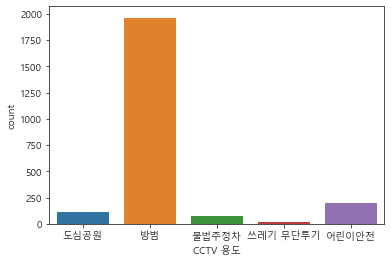

In [10]:
# CCTV 용도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")
plt.rc('font',family = 'Malgun Gothic')
sns.countplot(x="CCTV 용도",data=cctv_data_au)

In [11]:
# 지도의 크기를 지정하기 위해 cctv의 위치 정보를 활용한다.
print(max(cctv_data_ll["위도"]))
print(min(cctv_data_ll["위도"]))
print(max(cctv_data_ll["경도"]))
print(min(cctv_data_ll["경도"]))

37.58878942
37.527225
126.8772256
126.798618


In [40]:
# 강서구 행정구역 표시
import json
import folium

gangseo_map = folium.Map(location=[37.55800721,126.84], zoom_start=14)

with open("../data/ganseo.json", mode= "rt",encoding= "utf-8") as f:
    geo = json.loads(f.read())
    f.close

folium.GeoJson(geo,name="seoul").add_to(gangseo_map)

In [36]:
gangseo_map = folium.Map(location=[37.55800721,126.84], zoom_start=14)

In [28]:
# 지도에 ccvt 위치 표시
for lat,lng in zip(cctv_data_ll.위도, cctv_data_ll.경도):
    folium.Marker([lat,lng]).add_to(gangseo_map)

gangseo_map.save('./강서구 cctv 지도.html')

In [39]:
gangseo_map

In [34]:
from folium.plugins import HeatMap

gangseo_heatmap = folium.Map(location=[37.55800721,126.84], zoom_start=14)

heatmap = HeatMap(cctv_data_ll)

In [37]:
gangseo_heatmap.save("./강서구 cctv 히트맵.html")